In [1]:
import re
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
accept_file_path = "Data/accepted_2007_to_2018Q4.csv"

In [3]:
#reading accept csv file
accept_df = pd.read_csv(accept_file_path)

C:\Users\glori\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
reject_file_path = "Data/rejected_2007_to_2018Q4.csv"

In [5]:
#reading reject csv file
reject_df = pd.read_csv(reject_file_path)

In [6]:
list(accept_df)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [7]:
list(reject_df)

['Amount Requested',
 'Application Date',
 'Loan Title',
 'Risk_Score',
 'Debt-To-Income Ratio',
 'Zip Code',
 'State',
 'Employment Length',
 'Policy Code']

In [8]:
print(reject_df['Loan Title'].unique())
print('-------------------')
print(accept_df['purpose'].unique())
print('-------------------')
print(accept_df['title'].unique())

['Wedding Covered but No Honeymoon' 'Consolidating Debt'
 'Want to consolidate my debt' ... 'dougie03' 'freeup'
 'Business Advertising Loan']
-------------------
['debt_consolidation' 'small_business' 'home_improvement' 'major_purchase'
 'credit_card' 'other' 'house' 'vacation' 'car' 'medical' 'moving'
 'renewable_energy' 'wedding' 'educational' nan]
-------------------
['Debt consolidation' 'Business' nan ... 'takeitaway' 'Creditt Card Loan'
 'debt reduction/hone updates']


In [9]:
#needed columns from the accepted data
clean_accept_df = accept_df[[
    'loan_amnt',
    'int_rate',
    'issue_d',
    'fico_range_high',
    'dti',
    'zip_code',
    'addr_state',
    'emp_length',
    'purpose'
]]

In [10]:
#columns from the rejected data
clean_reject_df = reject_df[['Amount Requested',
 'Application Date',
 'Risk_Score',
 'Debt-To-Income Ratio',
 'Zip Code',
 'State',
 'Employment Length',
 'Loan Title']]

In [11]:
clean_accept_df.shape

(2260701, 9)

In [12]:
clean_reject_df.shape

(27648741, 8)

In [13]:
#added target value to the accepted data
clean_accept_df['Loan Status'] = "Accepted"
clean_accept_df.head()

<ipython-input-13-841988178c2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_accept_df['Loan Status'] = "Accepted"


,loan_amnt,int_rate,issue_d,fico_range_high,dti,zip_code,addr_state,emp_length,purpose,Loan Status
0,3600.0,13.99,Dec-2015,679.0,5.91,190xx,PA,10+ years,debt_consolidation,Accepted
1,24700.0,11.99,Dec-2015,719.0,16.06,577xx,SD,10+ years,small_business,Accepted
2,20000.0,10.78,Dec-2015,699.0,10.78,605xx,IL,10+ years,home_improvement,Accepted
3,35000.0,14.85,Dec-2015,789.0,17.06,076xx,NJ,10+ years,debt_consolidation,Accepted
4,10400.0,22.45,Dec-2015,699.0,25.37,174xx,PA,3 years,major_purchase,Accepted


In [14]:
# adding a target value to the rejected data
clean_reject_df['Loan Status'] = "Rejected"
clean_reject_df.head()

,Amount Requested,Application Date,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Loan Title,Loan Status
0,1000.0,2007-05-26,693.0,10%,481xx,NM,4 years,Wedding Covered but No Honeymoon,Rejected
1,1000.0,2007-05-26,703.0,10%,010xx,MA,< 1 year,Consolidating Debt,Rejected
2,11000.0,2007-05-27,715.0,10%,212xx,MD,1 year,Want to consolidate my debt,Rejected
3,6000.0,2007-05-27,698.0,38.64%,017xx,MA,< 1 year,waksman,Rejected
4,1500.0,2007-05-27,509.0,9.43%,209xx,MD,< 1 year,mdrigo,Rejected


In [15]:
clean_accept_df['int_rate'].describe() #interest rates in accept data (min 5.321%, max 3.09%)

count    2.260668e+06
mean     1.309283e+01
std      4.832138e+00
min      5.310000e+00
25%      9.490000e+00
50%      1.262000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

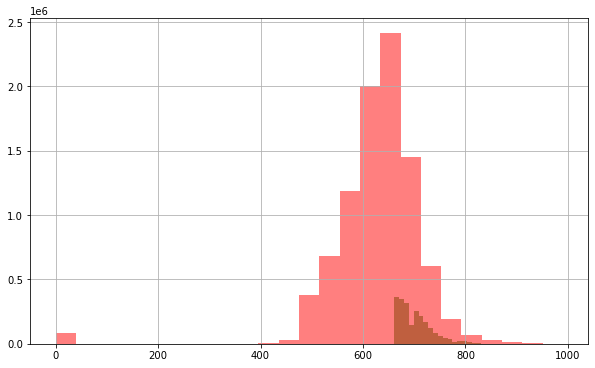

In [16]:
#histogram correlation b/t fico score and Risk Score
plt.figure(figsize=(10,6))
clean_accept_df["fico_range_high"].hist(alpha=.5, color='green', bins=25), clean_reject_df["Risk_Score"].hist(alpha=.5, color='red', bins=25)
plt.show()

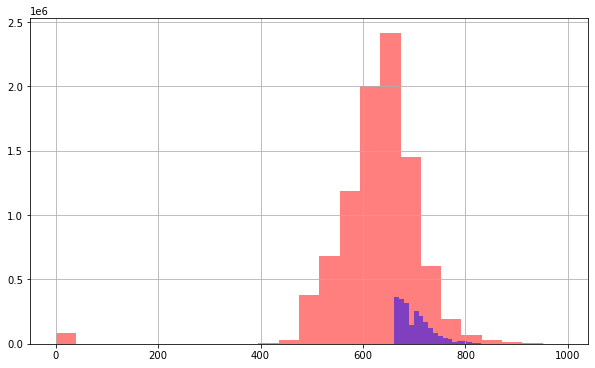

In [17]:
#correlation b/t Risk Score and fico
plt.figure(figsize=(10,6))
clean_reject_df["Risk_Score"].hist(alpha=.5, color='red', bins=25), clean_accept_df["fico_range_high"].hist(alpha=.5, color='blue', bins=25)
plt.show()

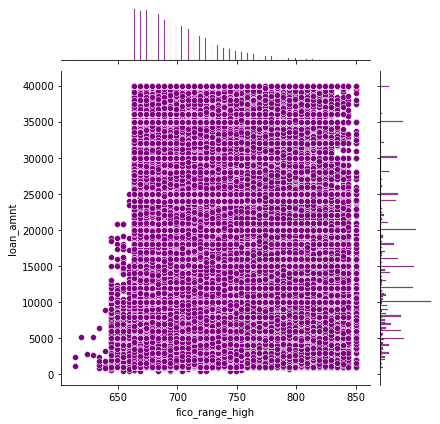

In [18]:
sns.jointplot(x="fico_range_high", y="loan_amnt", data=clean_accept_df, color='purple')

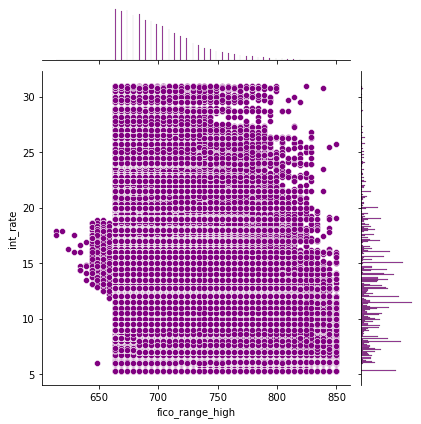

In [19]:
sns.jointplot(x="fico_range_high", y="int_rate", data=clean_accept_df, color='purple')

In [20]:
print(clean_accept_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   loan_amnt        float64
 1   int_rate         float64
 2   issue_d          object 
 3   fico_range_high  float64
 4   dti              float64
 5   zip_code         object 
 6   addr_state       object 
 7   emp_length       object 
 8   purpose          object 
 9   Loan Status      object 
dtypes: float64(4), object(6)
memory usage: 172.5+ MB
None


In [21]:
print(clean_reject_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Risk_Score            float64
 3   Debt-To-Income Ratio  object 
 4   Zip Code              object 
 5   State                 object 
 6   Employment Length     object 
 7   Loan Title            object 
 8   Loan Status           object 
dtypes: float64(2), object(7)
memory usage: 1.9+ GB
None


In [22]:
#accepted issue date as date
clean_accept_df['issue_d'] = pd.to_datetime(clean_accept_df['issue_d'])
clean_accept_df.head()

<ipython-input-22-51609ae8d551>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_accept_df['issue_d'] = pd.to_datetime(clean_accept_df['issue_d'])


,loan_amnt,int_rate,issue_d,fico_range_high,dti,zip_code,addr_state,emp_length,purpose,Loan Status
0,3600.0,13.99,2015-12-01,679.0,5.91,190xx,PA,10+ years,debt_consolidation,Accepted
1,24700.0,11.99,2015-12-01,719.0,16.06,577xx,SD,10+ years,small_business,Accepted
2,20000.0,10.78,2015-12-01,699.0,10.78,605xx,IL,10+ years,home_improvement,Accepted
3,35000.0,14.85,2015-12-01,789.0,17.06,076xx,NJ,10+ years,debt_consolidation,Accepted
4,10400.0,22.45,2015-12-01,699.0,25.37,174xx,PA,3 years,major_purchase,Accepted


In [50]:
#2018 accept data
accept_filtered_df = clean_accept_df[clean_accept_df['issue_d'].dt.year==2018]
accept_filtered_df.head()

,loan_amnt,int_rate,issue_d,fico_range_high,dti,zip_code,addr_state,emp_length,purpose,Loan Status
421097,5000.0,20.39,2018-03-01,669.0,21.80,740xx,OK,8 years,other,Accepted
421098,15000.0,9.92,2018-03-01,704.0,18.29,337xx,FL,2 years,debt_consolidation,Accepted
421099,11200.0,30.79,2018-03-01,669.0,43.97,030xx,NH,< 1 year,medical,Accepted
421100,25000.0,21.85,2018-03-01,669.0,12.89,361xx,AL,10+ years,debt_consolidation,Accepted
421101,3000.0,7.34,2018-03-01,764.0,0.58,988xx,WA,9 years,major_purchase,Accepted


In [51]:
#see the array
accept_filtered_df ['issue_d'].dt.year.unique()

array([2018], dtype=int64)

In [52]:
#rejected application date as date
clean_reject_df['Application Date'] = pd.to_datetime(clean_reject_df['Application Date'])
clean_reject_df.head()

,Amount Requested,Application Date,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Loan Title,Loan Status
0,1000.0,2007-05-26,693.0,10%,481xx,NM,4 years,Wedding Covered but No Honeymoon,Rejected
1,1000.0,2007-05-26,703.0,10%,010xx,MA,< 1 year,Consolidating Debt,Rejected
2,11000.0,2007-05-27,715.0,10%,212xx,MD,1 year,Want to consolidate my debt,Rejected
3,6000.0,2007-05-27,698.0,38.64%,017xx,MA,< 1 year,waksman,Rejected
4,1500.0,2007-05-27,509.0,9.43%,209xx,MD,< 1 year,mdrigo,Rejected


In [53]:
#2018 reject data
reject_filtered_df = clean_reject_df[clean_reject_df['Application Date'].dt.year==2018]
reject_filtered_df.head()

,Amount Requested,Application Date,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Loan Title,Loan Status
4404427,3000.0,2018-07-01,NaN,100%,925xx,CA,< 1 year,Debt consolidation,Rejected
4404428,40000.0,2018-07-01,NaN,7.45%,335xx,FL,< 1 year,Major purchase,Rejected
4404429,16000.0,2018-07-01,NaN,34.93%,156xx,PA,< 1 year,Debt consolidation,Rejected
4404430,40000.0,2018-07-01,NaN,27.87%,957xx,CA,< 1 year,Debt consolidation,Rejected
4404431,300000.0,2018-07-01,NaN,-1%,258xx,TN,< 1 year,Business Loan,Rejected


In [54]:
#see the array
reject_filtered_df ['Application Date'].dt.year.unique()

array([2018], dtype=int64)

In [55]:
reject_filtered_df.rename(
columns=({"Amount Requested": "loan_amt", "Application Date": "issue_d", "Risk_Score": "fico_range_high", "Debt-To-Income Ratio": "dti", "Zip Code": "zip_code", "State": "addr_state", "Employment Length": "emp_length", "Loan Title": "purpose"}), inplace=True,
)
reject_filtered_df.head()

C:\Users\glori\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,loan_amt,issue_d,fico_range_high,dti,zip_code,addr_state,emp_length,purpose,Loan Status
4404427,3000.0,2018-07-01,NaN,100%,925xx,CA,< 1 year,Debt consolidation,Rejected
4404428,40000.0,2018-07-01,NaN,7.45%,335xx,FL,< 1 year,Major purchase,Rejected
4404429,16000.0,2018-07-01,NaN,34.93%,156xx,PA,< 1 year,Debt consolidation,Rejected
4404430,40000.0,2018-07-01,NaN,27.87%,957xx,CA,< 1 year,Debt consolidation,Rejected
4404431,300000.0,2018-07-01,NaN,-1%,258xx,TN,< 1 year,Business Loan,Rejected


In [56]:
accept_filtered_df.head()

,loan_amnt,int_rate,issue_d,fico_range_high,dti,zip_code,addr_state,emp_length,purpose,Loan Status
421097,5000.0,20.39,2018-03-01,669.0,21.80,740xx,OK,8 years,other,Accepted
421098,15000.0,9.92,2018-03-01,704.0,18.29,337xx,FL,2 years,debt_consolidation,Accepted
421099,11200.0,30.79,2018-03-01,669.0,43.97,030xx,NH,< 1 year,medical,Accepted
421100,25000.0,21.85,2018-03-01,669.0,12.89,361xx,AL,10+ years,debt_consolidation,Accepted
421101,3000.0,7.34,2018-03-01,764.0,0.58,988xx,WA,9 years,major_purchase,Accepted


In [57]:
#categorical data to numerical data (accept)
accept_filtered_df.loc[(accept_filtered_df.emp_length == '< 1 year'), "emp_length"] = 0
accept_filtered_df.loc[(accept_filtered_df.emp_length == '1 year'), "emp_length"] = 1
accept_filtered_df.loc[(accept_filtered_df.emp_length == '2 years'), "emp_length"] = 2
accept_filtered_df.loc[(accept_filtered_df.emp_length == '3 years'), "emp_length"] = 3
accept_filtered_df.loc[(accept_filtered_df.emp_length == '4 years'), "emp_length"] = 4
accept_filtered_df.loc[(accept_filtered_df.emp_length == '5 years'), "emp_length"] = 5
accept_filtered_df.loc[(accept_filtered_df.emp_length == '6 years'), "emp_length"] = 6
accept_filtered_df.loc[(accept_filtered_df.emp_length == '7 years'), "emp_length"] = 7
accept_filtered_df.loc[(accept_filtered_df.emp_length == '8 years'), "emp_length"] = 8
accept_filtered_df.loc[(accept_filtered_df.emp_length == '9 years'), "emp_length"] = 9
accept_filtered_df.loc[(accept_filtered_df.emp_length == '10+ years'), "emp_length"] = 10

C:\Users\glori\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [58]:
#categorical data to numerical data (reject)
reject_filtered_df.loc[(reject_filtered_df.emp_length == '< 1 year'), "emp_length"] = 0
reject_filtered_df.loc[(reject_filtered_df.emp_length == '1 year'), "emp_length"] = 1
reject_filtered_df.loc[(reject_filtered_df.emp_length == '2 years'), "emp_length"] = 2
reject_filtered_df.loc[(reject_filtered_df.emp_length == '3 years'), "emp_length"] = 3
reject_filtered_df.loc[(reject_filtered_df.emp_length == '4 years'), "emp_length"] = 4
reject_filtered_df.loc[(reject_filtered_df.emp_length == '5 years'), "emp_length"] = 5
reject_filtered_df.loc[(reject_filtered_df.emp_length == '6 years'), "emp_length"] = 6
reject_filtered_df.loc[(reject_filtered_df.emp_length == '7 years'), "emp_length"] = 7
reject_filtered_df.loc[(reject_filtered_df.emp_length == '8 years'), "emp_length"] = 8
reject_filtered_df.loc[(reject_filtered_df.emp_length == '9 years'), "emp_length"] = 9
reject_filtered_df.loc[(reject_filtered_df.emp_length == '10+ years'), "emp_length"] = 10

In [60]:
final_accept_df = accept_filtered_df.drop(['zip_code', 'issue_d'], axis = 1)
final_reject_df = reject_filtered_df.drop(['zip_code', 'issue_d'], axis = 1)

In [61]:
print(final_accept_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495242 entries, 421097 to 1611876
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   loan_amnt        495242 non-null  float64
 1   int_rate         495242 non-null  float64
 2   fico_range_high  495242 non-null  float64
 3   dti              494110 non-null  float64
 4   addr_state       495242 non-null  object 
 5   emp_length       453255 non-null  object 
 6   purpose          495242 non-null  object 
 7   Loan Status      495242 non-null  object 
dtypes: float64(4), object(4)
memory usage: 34.0+ MB
None


In [62]:
print(final_reject_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9496782 entries, 4404427 to 19699075
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   loan_amt         float64
 1   fico_range_high  float64
 2   dti              object 
 3   addr_state       object 
 4   emp_length       object 
 5   purpose          object 
 6   Loan Status      object 
dtypes: float64(2), object(5)
memory usage: 579.6+ MB
None


In [64]:
#drop na values in accept df
final_accept_df = final_accept_df.dropna()
final_accept_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453176 entries, 421097 to 1611876
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   loan_amnt        453176 non-null  float64
 1   int_rate         453176 non-null  float64
 2   fico_range_high  453176 non-null  float64
 3   dti              453176 non-null  float64
 4   addr_state       453176 non-null  object 
 5   emp_length       453176 non-null  object 
 6   purpose          453176 non-null  object 
 7   Loan Status      453176 non-null  object 
dtypes: float64(4), object(4)
memory usage: 31.1+ MB


In [65]:
#drop na values in reject df
final_reject_df = final_reject_df.dropna()
final_reject_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628344 entries, 4404458 to 19699073
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   loan_amt         628344 non-null  float64
 1   fico_range_high  628344 non-null  float64
 2   dti              628344 non-null  object 
 3   addr_state       628344 non-null  object 
 4   emp_length       628344 non-null  object 
 5   purpose          628344 non-null  object 
 6   Loan Status      628344 non-null  object 
dtypes: float64(2), object(5)
memory usage: 38.4+ MB


In [66]:
filenames = [final_accept_df, final_reject_df]
combined_data = pd.concat(filenames)

In [67]:
combined_data.head()

,loan_amnt,int_rate,fico_range_high,dti,addr_state,emp_length,purpose,Loan Status,loan_amt
421097,5000.0,20.39,669.0,21.8,OK,8,other,Accepted,NaN
421098,15000.0,9.92,704.0,18.29,FL,2,debt_consolidation,Accepted,NaN
421099,11200.0,30.79,669.0,43.97,NH,0,medical,Accepted,NaN
421100,25000.0,21.85,669.0,12.89,AL,10,debt_consolidation,Accepted,NaN
421101,3000.0,7.34,764.0,0.58,WA,9,major_purchase,Accepted,NaN


In [70]:
combined_data.to_csv('Data/model_1_combine_data.csv')

In [79]:
combined_data.shape

(1081520, 9)

In [73]:
accept_filtered_df.to_csv('Data/model_1_accept_data.csv')

In [74]:
accept_filtered_df.head(5)

,loan_amnt,int_rate,issue_d,fico_range_high,dti,zip_code,addr_state,emp_length,purpose,Loan Status
421097,5000.0,20.39,2018-03-01,669.0,21.80,740xx,OK,8,other,Accepted
421098,15000.0,9.92,2018-03-01,704.0,18.29,337xx,FL,2,debt_consolidation,Accepted
421099,11200.0,30.79,2018-03-01,669.0,43.97,030xx,NH,0,medical,Accepted
421100,25000.0,21.85,2018-03-01,669.0,12.89,361xx,AL,10,debt_consolidation,Accepted
421101,3000.0,7.34,2018-03-01,764.0,0.58,988xx,WA,9,major_purchase,Accepted


In [75]:
accept_filtered_df.shape


(495242, 10)

In [76]:
reject_filtered_df.to_csv('Data/model_1_reject_data.csv')

In [77]:
reject_filtered_df.head(5)

,loan_amt,issue_d,fico_range_high,dti,zip_code,addr_state,emp_length,purpose,Loan Status
4404427,3000.0,2018-07-01,NaN,100%,925xx,CA,0,Debt consolidation,Rejected
4404428,40000.0,2018-07-01,NaN,7.45%,335xx,FL,0,Major purchase,Rejected
4404429,16000.0,2018-07-01,NaN,34.93%,156xx,PA,0,Debt consolidation,Rejected
4404430,40000.0,2018-07-01,NaN,27.87%,957xx,CA,0,Debt consolidation,Rejected
4404431,300000.0,2018-07-01,NaN,-1%,258xx,TN,0,Business Loan,Rejected


In [78]:
reject_filtered_df.shape

(9496782, 9)

In [ ]:
!pip install sklearn --upgrade